# Mathematical biology 
In this section, we will go through some of the applications in the mathematical modeling.


## 1. Lotka Voltera model
Also known as predator-prey model, it is useful in describing the dynamics of the population of two species which depend on each other. For example, foxes (predator) and rabbits (prey).

Mathematically, the dynamics of the population over time is given by a system of first-order non-linear ODEs:
$$ \frac{dx}{dt} = x(\alpha -\beta y)$$
$$ $$
$$ \frac{dy}{dt} = y(-\delta +\gamma x)$$
for $\alpha, \beta, \gamma, \delta > 0$

Here $x$ represents the population of the preying species while $y$ represents the population of the predators while $\frac{dx}{dt}$ and $\frac{dy}{dt}$ represents the changes in the populations.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import random
from scipy import integrate

In [49]:
## code to compute derivatives
def compute_derivative( state, time, alpha, beta, delta, gamma ):
    x, y  = state
    x_dot = x * ( alpha - beta * y )
    y_dot = y * ( -delta + gamma * x )
    return np.array( [ x_dot, y_dot ] )

In [50]:
alpha = 1.0 # natural growth rate of prey when there are no predators
beta  = 1.0 # natural dying rate of prey due to predation
gamma = 1.0 # natural growth rate of predator due to abundance of prey
delta = 1.0 # natural dying rate of predator when there are no preys

## initial conditions
x_0 = 5.0 # rabbit population
y_0 = 2.0 # foxes population

Nt    = 1000
tmax  = 30.
t     = np.linspace( 0., tmax, Nt )
state = [ x_0, y_0 ]
res   = integrate.odeint( compute_derivative, state, t, args=( alpha, beta, delta, gamma ) )
x, y  = res.T

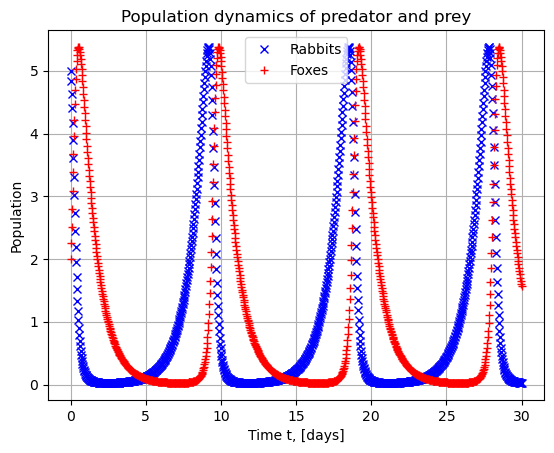

In [28]:
## populatioin dynamics plots
plt.figure()
plt.grid()
plt.title( "Population dynamics of predator and prey" )
plt.plot( t, x, "xb", label="Rabbits" )
plt.plot( t, y, "+r", label="Foxes" )
plt.xlabel( "Time t, [days]" )
plt.ylabel( "Population" )
plt.legend()
plt.show()

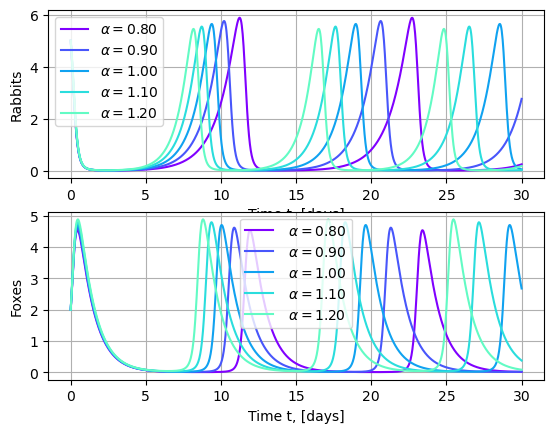

In [36]:
## Parameter analysis
### alphas
alphas  = np.arange( 0.8, 1.3, 0.1 )
nums    = np.random.random( ( 10, len( alphas ) ) )
colors  = cm.rainbow( np.linspace( 0, 1, nums.shape[ 0 ] ) )  # generate the colors for each data set
fig, ax = plt.subplots(2,1)

for alpha, idx in zip( alphas, range( len( alphas ) ) ):
    res = integrate.odeint(compute_derivative, state, t, args=( alpha, beta, delta, gamma ) )
    ax[0].plot(t, res[:,0], color = colors[idx], linestyle = '-', label = r"$\alpha = $" + "{0:.2f}".format(alpha))
    ax[1].plot(t, res[:,1], color = colors[idx], linestyle = '-', label = r" $\alpha = $" + "{0:.2f}".format(alpha))
    ax[0].legend()
    ax[1].legend()

ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Time t, [days]')
ax[0].set_ylabel('Rabbits')
ax[1].set_xlabel('Time t, [days]')
ax[1].set_ylabel('Foxes');

## setting alpha back to the original value
alpha = 1.0

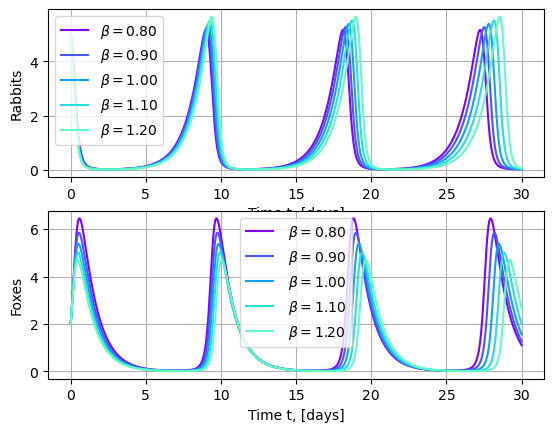

In [37]:
## beta
betas   = np.arange( 0.8, 1.3, 0.1 )
fig, ax = plt.subplots(2,1)

for beta, idx in zip( betas, range( len( betas ) ) ):
    res = integrate.odeint(compute_derivative, state, t, args=( alpha, beta, delta, gamma ) )
    ax[0].plot( t, res[:,0], color=colors[idx], linestyle='-', label=r"$\beta = $" + "{0:.2f}".format( beta ) )
    ax[1].plot( t, res[:,1], color=colors[idx], linestyle='-', label=r" $\beta = $" + "{0:.2f}".format( beta ) )
    ax[0].legend()
    ax[1].legend()

ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Time t, [days]')
ax[0].set_ylabel('Rabbits')
ax[1].set_xlabel('Time t, [days]')
ax[1].set_ylabel('Foxes');

## setting beta back to the original value
beta = 1.0

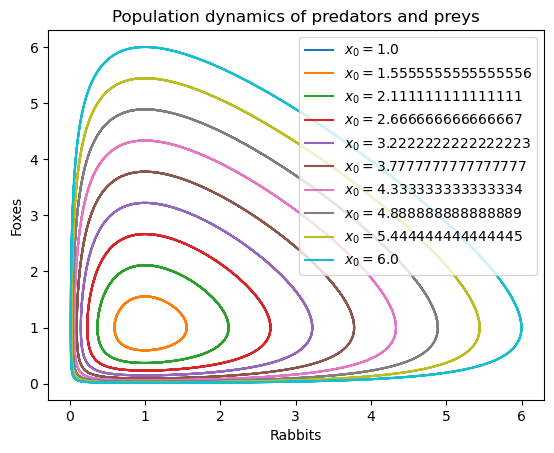

In [40]:
## phase plots
plt.figure()
initial_cond = np.linspace( 1.0, 6.0, 10 ) # initial conditions for prey population
for rabbit_pop in initial_cond:
    initial_state = [ rabbit_pop, 1.0 ]
    pop_dynamics  = integrate.odeint( compute_derivative, initial_state, t, args=( alpha, beta, delta, gamma ) )
    plt.plot(pop_dynamics[:,0], pop_dynamics[:,1], "-", label = "$x_0 =$"+str( initial_state[ 0 ] ) )
plt.xlabel( "Rabbits" )
plt.ylabel( "Foxes" )
plt.legend()
plt.title("Population dynamics of predators and preys");

## 2. Epidemics modeling

One of the interesting class of models for predicting the dynamics of the contegious diseases is Compartmental models, where general population is assigned to either of Susceptible, Infectious or Recovered (SIR) compartments. People then progress between these compartments and the models try to appoximate how many people will be in a particular compartment as the diseases spread. 

In order to formulate the dynamics of the spread of the epidemic, we start with assumig S, I and R are functions of time and people in category S (susceptible) can get infected after being in contact with an I (infected) individual. It is also assumed that population in category I develops immunity to the disease and tehy leave the I category at a cure rate denoted by $\gamma$.

With the total population $N= S + I + R$ being constant, it is rather simple model with huge approximations. Assuming, on average, an individual S encounters $\beta$ individuals per time interval, and $\gamma$ individuals leaving the infected group.

Mathematically, dynamics can be captured by following system of equations:

$$
\begin{align*}
\frac{dS}{dt} &=- \frac{\beta S}{N}I \\
\\
\frac{dI}{dt} &= \frac{\beta S}{N}I - \gamma I \\
\\
\frac{dR}{dt} &= \gamma I \\
\end{align*}
$$


Some remarks on the model :
1. The average infection period (i.e. the mean period during which an infected invidual can pass it on) is equal to $\frac{1}{\gamma}$
2. It’s a deterministic model
3. The assumption of a constant average number of contacts $\beta$ is a strong and constraining assumption, it cannot be applied to all diseases.

In [72]:
## define linspace and derivative
def compute_SIR_derivative(state, t):
    s, i, r, = state
    n        = s + i + r 
    s_dot    = -beta * s * i / n
    i_dot    = beta * s * i / n - gamma * i
    r_dot    = gamma * i
    return np.array([s_dot, i_dot, r_dot])

In [86]:
## Initial setting
n             = 1000.0        # Total number of individuals, N
i_0, r_0      = 2.0, 0.       # Initial number of infected and recovered individuals
s_0           = n - i_0 - r_0 # Number of Susceptible individuals to infection initially
beta, gamma   = 0.3, 0.1      # Contraction rate and average recovery rate
t_max         = 365           # grid of time points (in days)
t             = np.linspace( 0, t_max, t_max+1 )

## solve the ODE
initial_state       = s_0, i_0, r_0 # Initial conditions vector
system_evol         = integrate.odeint( compute_SIR_derivative, initial_state, t )
s_vec, i_vec, r_vec = system_evol.T

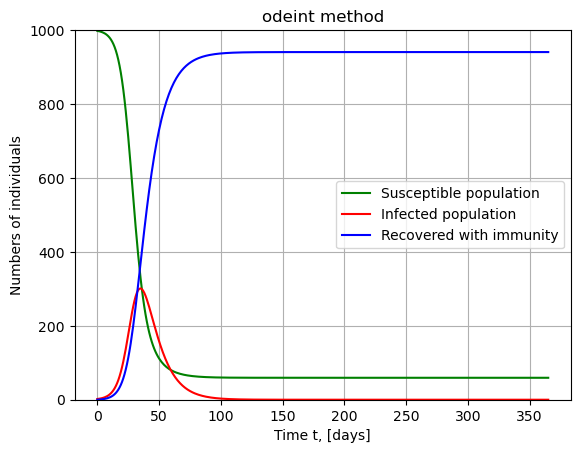

In [87]:
## population dynamics
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot( t, s_vec, 'g', label='Susceptible population' )
plt.plot( t, i_vec, 'r', label='Infected population' )
plt.plot( t, r_vec, 'b', label='Recovered with immunity' )
plt.xlabel( 'Time t, [days]' )
plt.ylabel( 'Numbers of individuals' )
plt.ylim( [ 0, n ] )
plt.legend()

plt.show();

## Basic Reproduction number $R_0$

$R_0$ is a parameter describing the average number of new infections due to a sick individual, or simply, the basic reproduction number. 
It’s a fundamental concept in epidemiology.

If $R_0 > 1$the epidemic will persist otherwise most of the population will gain immunity.

If a disease has an $R_0=3$, on an average, a person who has this disease will pass it on to three other people.

In the model formulation above, $R_0 = \frac{\beta}{\gamma}$ 

### Further models overview
1. Covid pandemic modelling

### References:
1. [SciPy docs](https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Lotka_Volterra_model.html)
2. [SIR Model SciPy cookbooks](https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Epidemic_model_SIR.html)
3. [SIR models- Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)
4. [Basic Reproduction Number](https://en.wikipedia.org/wiki/Basic_reproduction_number)